In [1]:
!pip install nba_api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.0/319.0 kB 10.7 MB/s eta 0:00:00


In [2]:
import nba_api
from nba_api.stats.endpoints import leaguegamelog
import pandas as pd
import numpy as np

gl = leaguegamelog.LeagueGameLog(season='2025-26', season_type_all_star='Regular Season')
df = gl.get_data_frames()[0]
df['HOME_OR_AWAY'] = np.where(
    df['MATCHUP'].str.contains(' vs. '), 1,
    np.where(df['MATCHUP'].str.contains(' @ '), 0, np.nan)
)
df['MATCHUP'] = df['MATCHUP'].apply(lambda x: x.split(' ')[2])

df['W/L'] = np.where(df['WL'] == 'W', 1, 0)
df = df.drop(columns=['SEASON_ID', 'TEAM_NAME', 'WL', 'VIDEO_AVAILABLE', 'PLUS_MINUS'])
df

,TEAM_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,MATCHUP,MIN,FGM,FGA,FG_PCT,FG3M,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,HOME_OR_AWAY,W/L
0,1610612745,HOU,0022500001,2025-10-21,OKC,290,43,97,0.443,11,...,36,52,23,6,5,25,26,124,0.0,0
1,1610612744,GSW,0022500002,2025-10-21,LAL,240,38,78,0.487,17,...,31,40,29,10,4,19,27,119,0.0,1
2,1610612747,LAL,0022500002,2025-10-21,GSW,240,42,77,0.545,8,...,32,39,23,7,2,20,21,109,1.0,0
3,1610612760,OKC,0022500001,2025-10-21,HOU,290,46,104,0.442,13,...,27,38,29,12,4,12,27,125,1.0,1
4,1610612737,ATL,0022500082,2025-10-22,TOR,240,38,90,0.422,10,...,26,34,25,7,6,16,24,118,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,1610612762,UTA,0022500316,2025-12-01,HOU,240,45,90,0.500,14,...,36,50,33,8,4,13,31,133,1.0,1
612,1610612745,HOU,0022500316,2025-12-01,UTA,240,41,93,0.441,10,...,30,46,27,6,8,13,26,125,0.0,0
613,1610612756,PHX,0022500317,2025-12-01,LAL,240,52,92,0.565,17,...,29,33,35,16,1,11,16,125,0.0,1
614,1610612747,LAL,0022500317,2025-12-01,PHX,240,41,80,0.513,13,...,34,39,18,1,0,22,13,108,1.0,0


In [3]:
matchups_df = df.merge(
    df,
    left_on=['GAME_ID', 'TEAM_ABBREVIATION', 'MATCHUP'],
    right_on=['GAME_ID', 'MATCHUP', 'TEAM_ABBREVIATION'],
    suffixes=('', '_OPP')
)
matchups_df

,TEAM_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,MATCHUP,MIN,FGM,FGA,FG_PCT,FG3M,...,DREB_OPP,REB_OPP,AST_OPP,STL_OPP,BLK_OPP,TOV_OPP,PF_OPP,PTS_OPP,HOME_OR_AWAY_OPP,W/L_OPP
0,1610612745,HOU,0022500001,2025-10-21,OKC,290,43,97,0.443,11,...,27,38,29,12,4,12,27,125,1.0,1
1,1610612744,GSW,0022500002,2025-10-21,LAL,240,38,78,0.487,17,...,32,39,23,7,2,20,21,109,1.0,0
2,1610612747,LAL,0022500002,2025-10-21,GSW,240,42,77,0.545,8,...,31,40,29,10,4,19,27,119,0.0,1
3,1610612760,OKC,0022500001,2025-10-21,HOU,290,46,104,0.442,13,...,36,52,23,6,5,25,26,124,0.0,0
4,1610612737,ATL,0022500082,2025-10-22,TOR,240,38,90,0.422,10,...,42,54,36,10,4,19,31,138,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,1610612762,UTA,0022500316,2025-12-01,HOU,240,45,90,0.500,14,...,30,46,27,6,8,13,26,125,0.0,0
612,1610612745,HOU,0022500316,2025-12-01,UTA,240,41,93,0.441,10,...,36,50,33,8,4,13,31,133,1.0,1
613,1610612756,PHX,0022500317,2025-12-01,LAL,240,52,92,0.565,17,...,34,39,18,1,0,22,13,108,1.0,0
614,1610612747,LAL,0022500317,2025-12-01,PHX,240,41,80,0.513,13,...,29,33,35,16,1,11,16,125,0.0,1


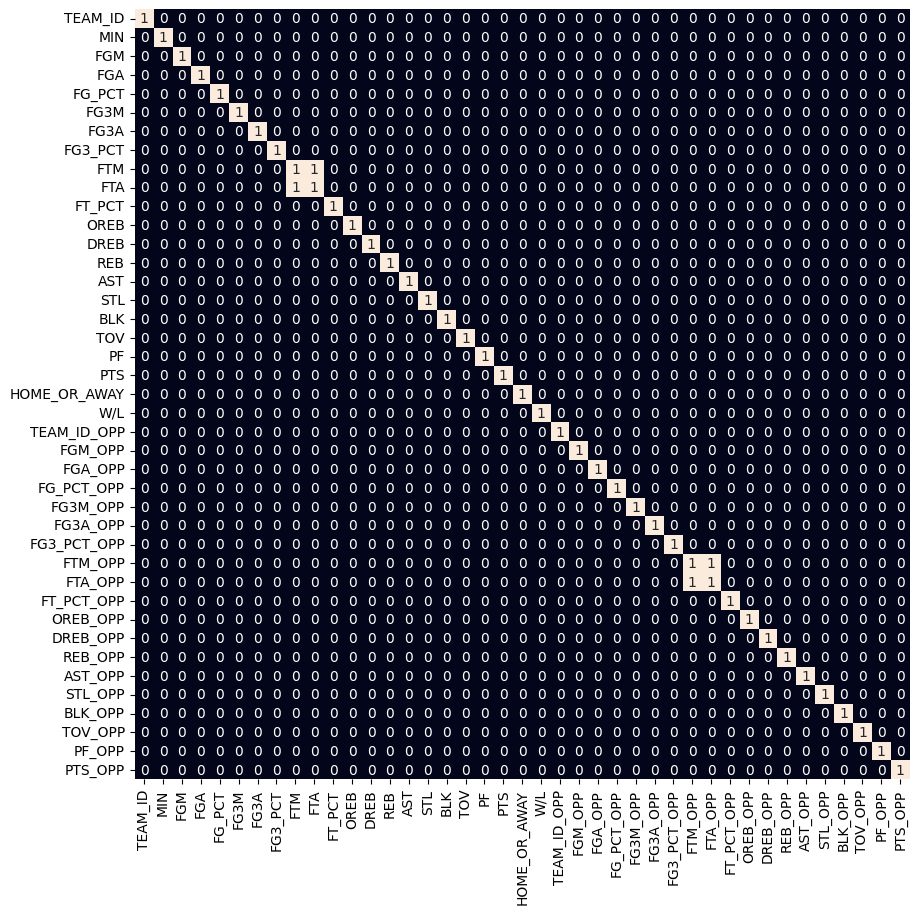

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

sns.heatmap(matchups_df.drop(columns=['TEAM_ABBREVIATION', 'MATCHUP', 'TEAM_ABBREVIATION_OPP', 'MATCHUP_OPP', 'GAME_DATE', 'GAME_DATE_OPP', 'MIN_OPP', 'W/L_OPP', 'HOME_OR_AWAY_OPP', 'GAME_ID']).corr() > 0.9, annot=True, cbar=False)
plt.show()

In [20]:
matchups_df.columns

Index(['TEAM_ID', 'TEAM_ABBREVIATION', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'HOME_OR_AWAY', 'W/L', 'TEAM_ID_OPP', 'TEAM_ABBREVIATION_OPP',
       'GAME_DATE_OPP', 'MATCHUP_OPP', 'MIN_OPP', 'FGM_OPP', 'FGA_OPP',
       'FG_PCT_OPP', 'FG3M_OPP', 'FG3A_OPP', 'FG3_PCT_OPP', 'FTM_OPP',
       'FTA_OPP', 'FT_PCT_OPP', 'OREB_OPP', 'DREB_OPP', 'REB_OPP', 'AST_OPP',
       'STL_OPP', 'BLK_OPP', 'TOV_OPP', 'PF_OPP', 'PTS_OPP',
       'HOME_OR_AWAY_OPP', 'W/L_OPP'],
      dtype='object')

In [22]:
X = matchups_df[['TEAM_ID', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF',
       'PTS', 'HOME_OR_AWAY', 'TEAM_ID_OPP', 'FGM_OPP', 'FGA_OPP',
       'FG_PCT_OPP', 'FG3M_OPP', 'FG3A_OPP', 'FG3_PCT_OPP', 'FTM_OPP',
       'FTA_OPP', 'FT_PCT_OPP', 'OREB_OPP', 'DREB_OPP', 'REB_OPP', 'AST_OPP', 'TOV_OPP',
       'STL_OPP', 'BLK_OPP', 'PF_OPP', 'PTS_OPP']]
y_wl = matchups_df[['W/L']]

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.svm import SVC
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y_wl.values.ravel(), test_size=0.25, random_state=42)

models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier(booster='gblinear')]

for i in range(3):
  models[i].fit(X_train, y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', roc_auc_score(
    y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', roc_auc_score(
    y_test, models[i].predict_proba(X_test)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5167456940982439
Validation Accuracy :  0.5010970464135022

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.3799314054388365
Validation Accuracy :  0.44261603375527425

XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 

We will use XGBoost with the gblinear booster as dart and gbtree were overfitting and LogisticRegression and SVC have poor accuracy.

In [24]:
from nba_api.stats.endpoints import leaguedashteamstats

team_stats = leaguedashteamstats.LeagueDashTeamStats(season='2025-26', league_id_nullable='00').get_data_frames()[0]
team_stats

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,1610612737,Atlanta Hawks,22,13,9,0.591,1066.000000,951,1961,0.485,...,14,1,25,3,5,17,21,17,3,15
1,1610612738,Boston Celtics,20,11,9,0.550,960.000000,847,1836,0.461,...,19,29,1,20,9,14,24,29,24,12
2,1610612751,Brooklyn Nets,20,4,16,0.200,960.000000,750,1705,0.440,...,30,23,10,29,28,11,8,16,29,27
3,1610612766,Charlotte Hornets,21,6,15,0.286,1018.000000,850,1873,0.454,...,10,15,22,27,11,7,5,9,12,22
4,1610612741,Chicago Bulls,20,9,11,0.450,970.000000,865,1822,0.475,...,12,9,14,24,11,29,11,27,14,20
5,1610612739,Cleveland Cavaliers,22,13,9,0.591,1061.000000,934,2018,0.463,...,5,6,18,6,3,10,26,4,1,11
6,1610612742,Dallas Mavericks,22,7,15,0.318,1071.000000,874,1946,0.449,...,2,15,29,11,1,25,25,2,11,23
7,1610612743,Denver Nuggets,20,14,6,0.700,965.000000,899,1767,0.509,...,15,7,5,28,25,7,2,15,9,3
8,1610612765,Detroit Pistons,21,17,4,0.810,1013.000000,912,1877,0.486,...,1,13,27,4,2,19,27,3,8,6
9,1610612744,Golden State Warriors,21,11,10,0.524,1013.000000,827,1834,0.451,...,16,10,27,4,20,3,16,26,13,16


In [25]:
cols_to_scale = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'PTS']
team_stats[cols_to_scale] = team_stats[cols_to_scale].div(team_stats['GP'], axis=0)

In [26]:
matchups = [[29, 22], [24, 27], [19, 1], [17, 18], [14, 26], [20, 9]]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y_wl.values.ravel(), test_size=0.25, random_state=42)

clf = XGBClassifier(booster='gblinear')
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [28]:
for i, matchup in enumerate(matchups):
  away = team_stats.iloc[[matchup[0]]].copy()
  home = team_stats.iloc[[matchup[1]]].copy()

  away['HOME_OR_AWAY'] = 0
  home['HOME_OR_AWAY'] = 1

  away = away.reset_index(drop=True)
  home = home.reset_index(drop=True)

  X_new1 = pd.concat([away, home.add_suffix('_OPP')], axis=1)
  X_new1 = X_new1.drop(columns=[c for c in X_new1.columns if c not in X.columns])

  X_new2 = pd.concat([home, away.add_suffix('_OPP')], axis=1)
  X_new2 = X_new2.drop(columns=[c for c in X_new2.columns if c not in X.columns])

  X_new = pd.concat([X_new1, X_new2]).reset_index(drop=True)

  probability = clf.predict_proba(X_new)

  print(f"{team_stats.iloc[[matchup[0]]]['TEAM_NAME']} win chance: {probability[0][1]*100}% / lose chance: {probability[0][0]*100}%")
  print(f"{team_stats.iloc[[matchup[1]]]['TEAM_NAME']} win chance: {probability[1][1]*100}% / lose chance: {probability[1][0]*100}%")
  print("--------------------------------------------------------------------------------------------------------")

29    Washington Wizards
Name: TEAM_NAME, dtype: object win chance: 21.186460494995117% / lose chance: 78.81353759765625%
22    Philadelphia 76ers
Name: TEAM_NAME, dtype: object win chance: 75.30522918701172% / lose chance: 24.69477081298828%
--------------------------------------------------------------------------------------------------------
24    Portland Trail Blazers
Name: TEAM_NAME, dtype: object win chance: 23.477073669433594% / lose chance: 76.5229263305664%
27    Toronto Raptors
Name: TEAM_NAME, dtype: object win chance: 70.53290557861328% / lose chance: 29.46709442138672%
--------------------------------------------------------------------------------------------------------
19    New York Knicks
Name: TEAM_NAME, dtype: object win chance: 60.454647064208984% / lose chance: 39.545352935791016%
1    Boston Celtics
Name: TEAM_NAME, dtype: object win chance: 32.21173858642578% / lose chance: 67.78826141357422%
--------------------------------------------------------------------